In [2]:
import torch

In [2]:
x= torch.Tensor([5,3])
y = torch.Tensor([3,4])

In [3]:
print(x*y)

tensor([15., 12.])


In [4]:
x= torch.zeros([2,5])

In [5]:
x 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [6]:
y = torch.rand([2,5])

In [7]:
y


tensor([[0.3996, 0.0335, 0.8959, 0.3686, 0.5969],
        [0.1446, 0.0367, 0.4110, 0.9466, 0.3426]])

In [8]:
#in torch reshape is view
y = y.view([1,10])

In [9]:
y 

tensor([[0.3996, 0.0335, 0.8959, 0.3686, 0.5969, 0.1446, 0.0367, 0.4110, 0.9466,
         0.3426]])

In [1]:
import torchvision 
from torchvision import transforms,datasets

In [3]:
train = datasets.MNIST("",train=True,download=True,
                       transform=transforms.Compose([transforms.ToTensor()])) 


test = datasets.MNIST("",train=False,download=True,
                       transform=transforms.Compose([transforms.ToTensor()])) 

In [4]:
trainset = torch.utils.data.DataLoader(train,
                                       batch_size=10,
                                      shuffle=True)
testset = torch.utils.data.DataLoader(test,
                                       batch_size=10,
                                      shuffle=True)  

In [5]:
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x,y = data[0][0],data[1][0]

print(y)

tensor(4)


In [7]:
data[0][0].shape

torch.Size([1, 28, 28])

In [8]:
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(*args, **kw)>

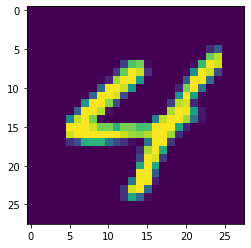

In [9]:
plt.imshow(data[0][0].view(28,28))
plt.show

In [10]:
total = 0 
counter_dict = {0:0,1:0,2:0,3:0,4:0,
               5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs,Ys = data 
    for y in Ys:
        counter_dict[int(y)]+=1
        total+=1
        
print(counter_dict)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
import torch.nn as nn 
import torch.nn.functional as F

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64) #64 is random
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10) #10 class

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1)  
    

        
        
net = Net()     
print(net) 

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
x = torch.rand((28,28))
x = x.view(-1,28*28)  # -1 and 1 to prepare for it any size

In [20]:
output = net(x)

In [21]:
output

tensor([[-2.2730, -2.3274, -2.2398, -2.3974, -2.3581, -2.1563, -2.3178, -2.2411,
         -2.3822, -2.3592]], grad_fn=<LogSoftmaxBackward>)

In [27]:
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(),lr=0.001)
EPOCHS = 3 

for epoch in range(EPOCHS):
    for data in trainset:
        X ,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward() 
        optimizer.step()
        
    print(loss)
        
        

tensor(0.3057, grad_fn=<NllLossBackward>)
tensor(0.0898, grad_fn=<NllLossBackward>)
tensor(0.0027, grad_fn=<NllLossBackward>)


In [29]:
correct = 0 
total = 0 

with torch.no_grad():
    for data in trainset:
        X,y = data 
        output = net(X.view(-1,784))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
                
            total+=1
            
print("ACCURACY",round(correct/total,3))            
    

ACCURACY 0.98


In [30]:
X 

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

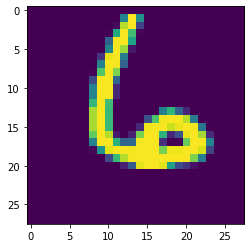

In [34]:
plt.imshow(X[1].view(28,28))
plt.show()

In [35]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(6)
